<h1><b>Self-Organizing Maps (SOM)</b></h1>

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=113de319f2dd8b8769ccdfaf98a3d1a6136a0fb1ddd909688cea3370d8598c78
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [2]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read the image and return the RGB values for each pixel
img = plt.imread('federer.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.017542497286563482


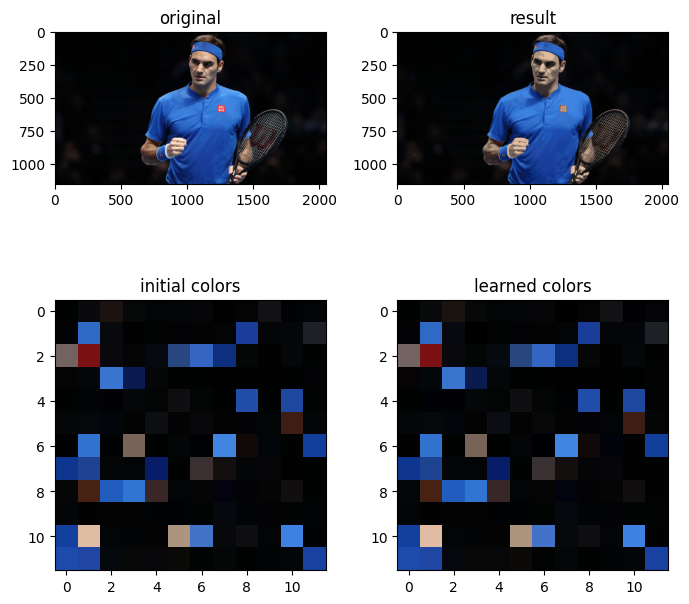

In [6]:
def SOM_function(img, pixels, grid_size, verbose, print_figure, print_colors):

  # SOM initialization and training
  if verbose: print('Training SOM...')
  som = MiniSom(grid_size, grid_size, 3, learning_rate=0.05, neighborhood_function='bubble')
  som.random_weights_init(pixels)
  starting_weights = som.get_weights().copy()  # saving the starting weights
  som.train(pixels, 10000, random_order=True, verbose=verbose)

  quant_error = som.quantization_error(pixels)
  qnt = som.quantization(pixels)  # quantize each pixels of the image
  clustered = np.zeros(img.shape)
  for i, q in enumerate(qnt):  # place the quantized values into a new image
      clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

  if print_figure:
    # show the result
    plt.figure(figsize=(7, 7))
    plt.figure(1)
    plt.subplot(221)
    plt.title('original')
    plt.imshow(img)
    plt.subplot(222)
    plt.title('result')
    plt.imshow(clustered)

  if print_colors:
    plt.subplot(223)
    plt.title('initial colors')
    plt.imshow(starting_weights, interpolation='none')
    plt.subplot(224)
    plt.title('learned colors')
    plt.imshow(som.get_weights(), interpolation='none')
    plt.tight_layout()
    plt.show()

  return quant_error, som

quant, model = SOM_function(img, pixels, 12, True, True, True)

Number of Iteration: 1
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.09621445730135629


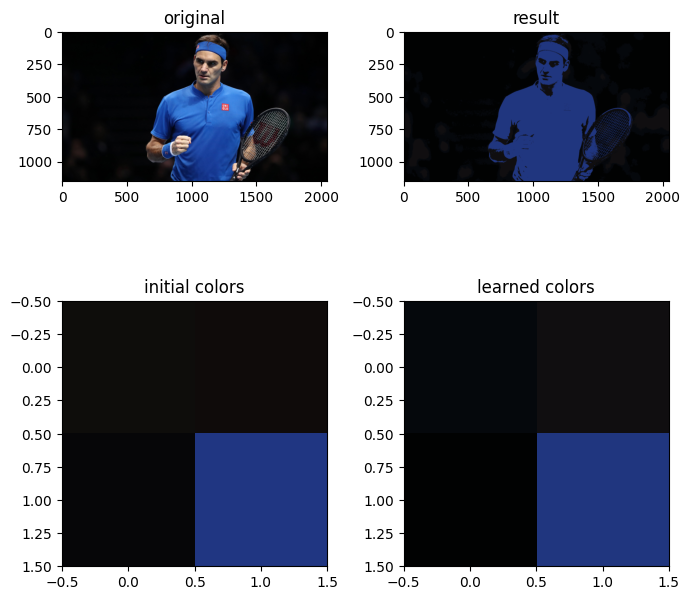

Number of Iteration: 2
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.18879455472181308


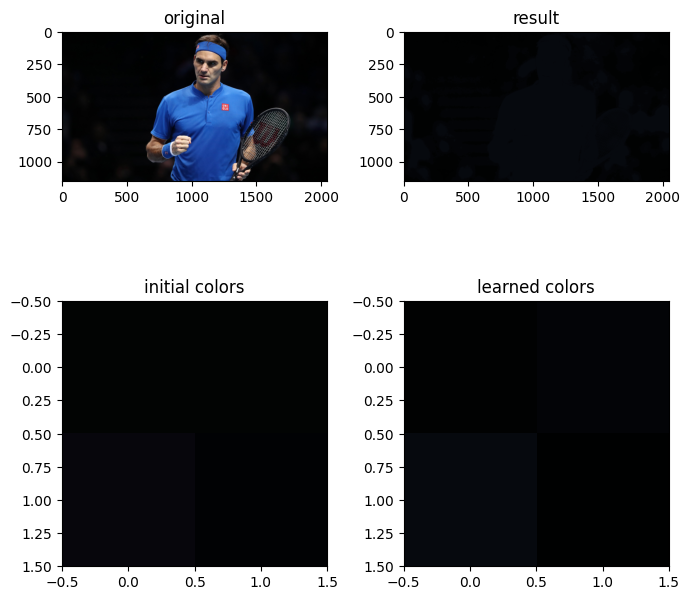

Number of Iteration: 3
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1691946695437539


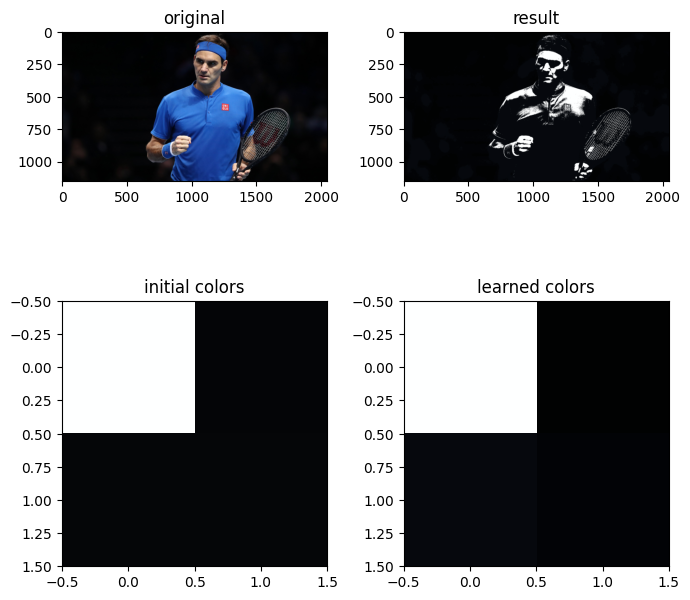

Number of Iteration: 4
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.08318823559240045


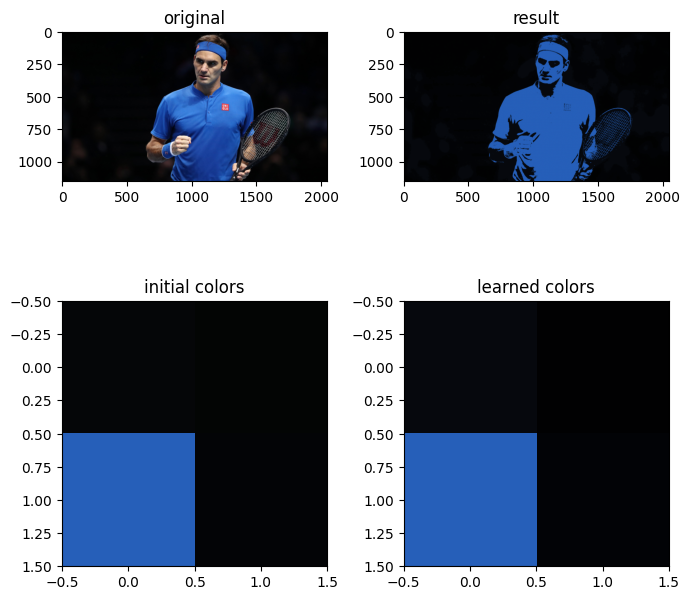

Number of Iteration: 5
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.18461630036477025


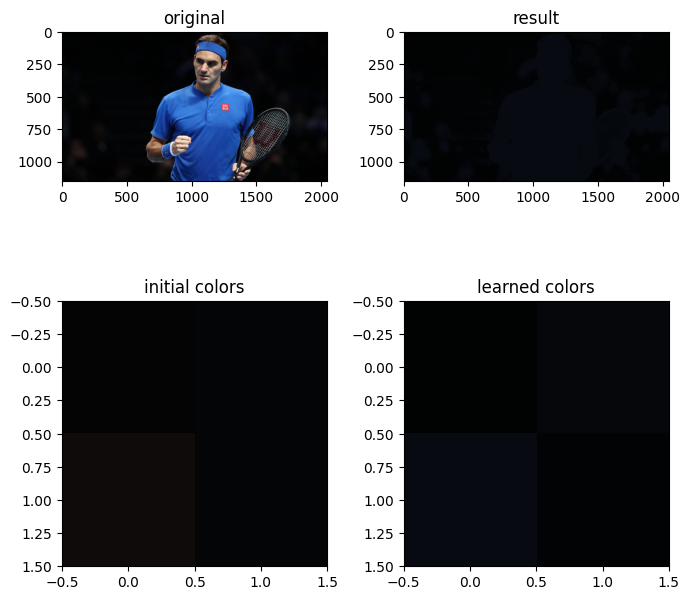

Number of Iteration: 6
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.08293311390546315


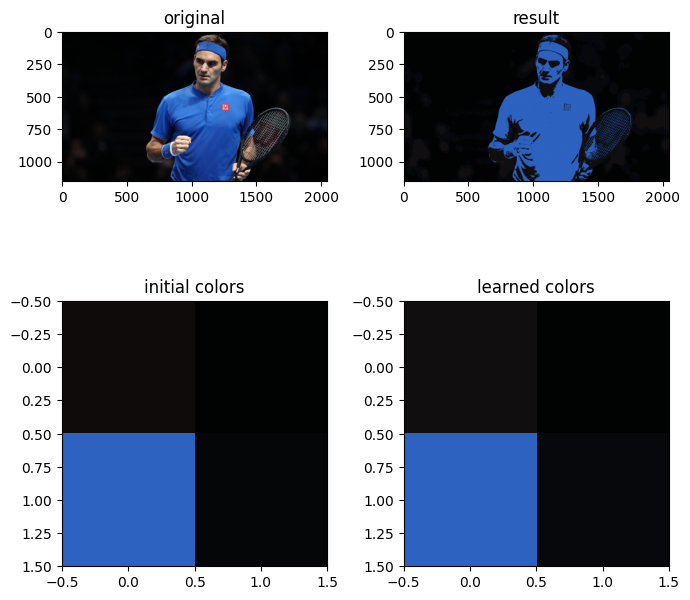

Number of Iteration: 7
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.19049868008013937


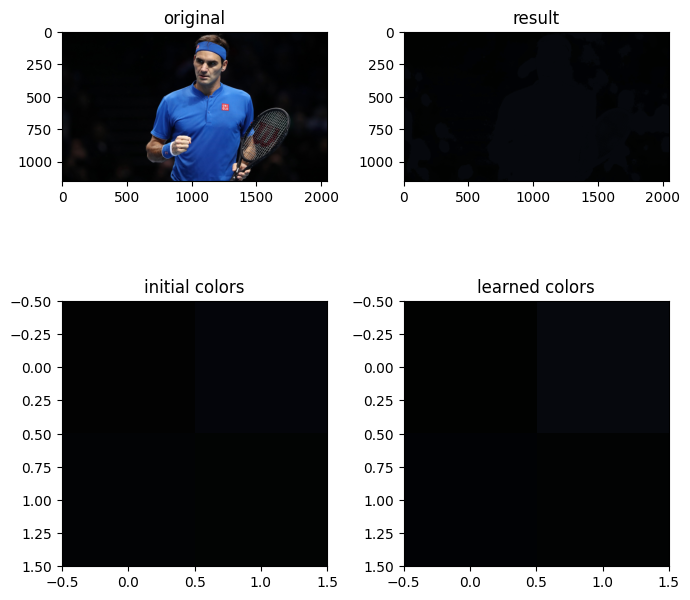

Number of Iteration: 8
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.18811313870085117


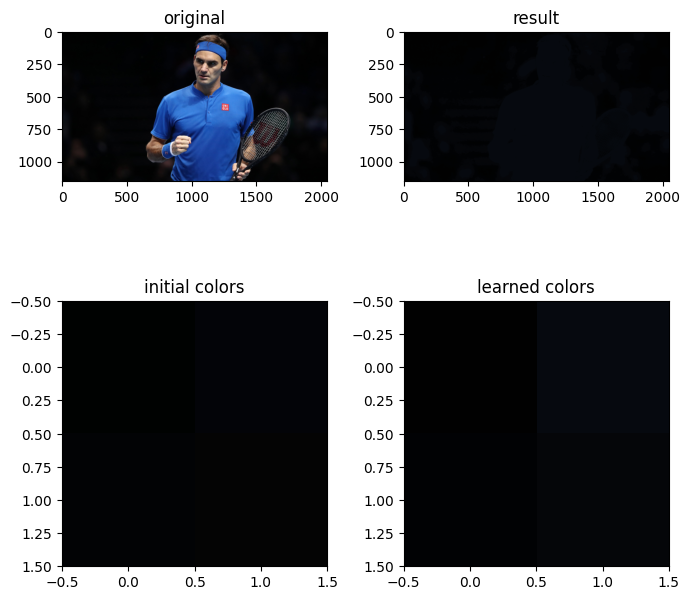

Number of Iteration: 9
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.07237505760159794


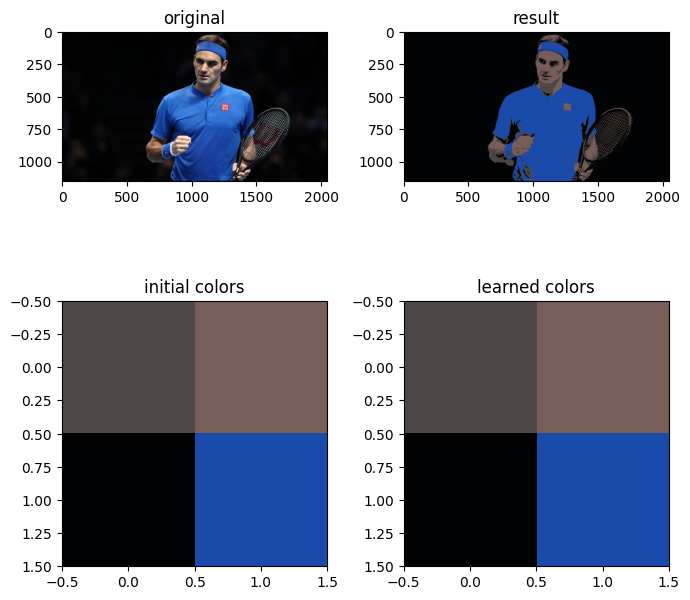

Number of Iteration: 10
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.13516981206574197


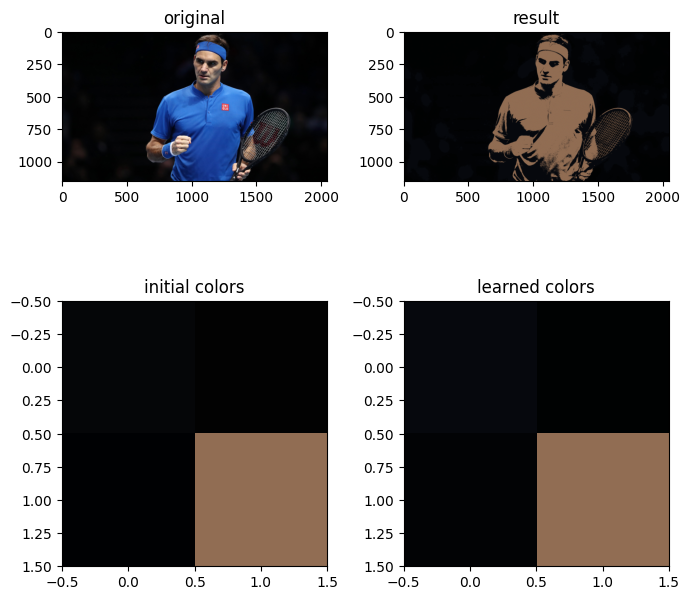

In [7]:
#run the code 10 times with a 2x2 grid
for i in range(10):
  print('Number of Iteration:', i+1)
  quant, model = SOM_function(img, pixels, 2, True, True, True)

In [8]:
quant_list = []
for i in range(2,10):
  quant, model = SOM_function(img, pixels, i, False, False, False)
  quant_list.append(quant)

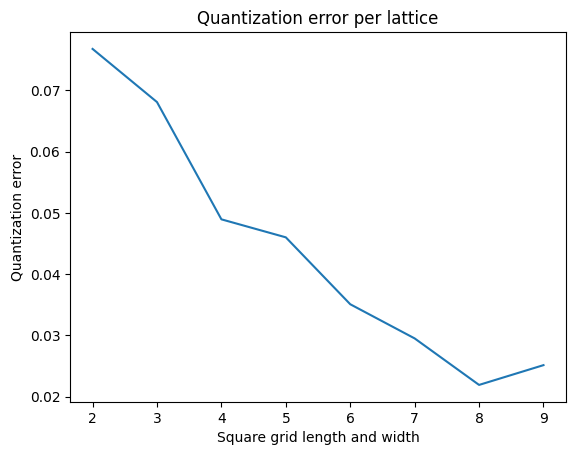

In [9]:
plt.plot(range(2, 10), quant_list)
plt.title('Quantization error per lattice')
plt.xlabel('Square grid length and width')
plt.ylabel('Quantization error')
plt.show()

Grid size 8x8...
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.029327239351594293


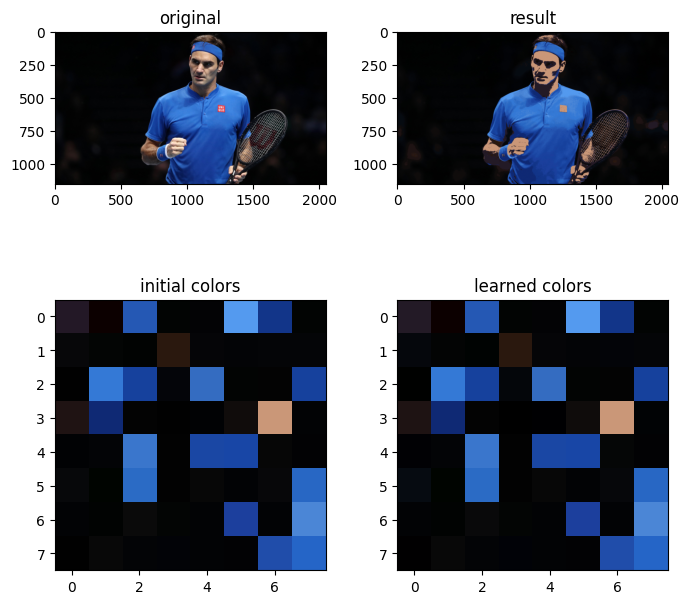

Grid size 12x12...
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.016125573752652948


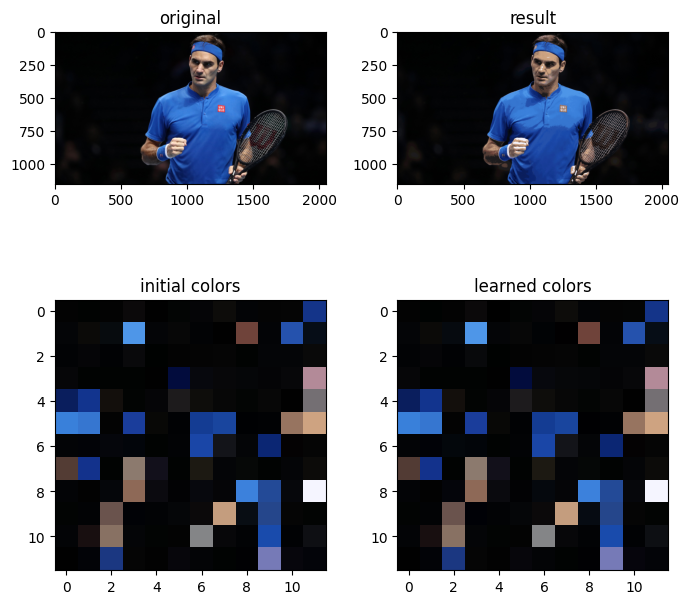

In [10]:
print('Grid size 8x8...')
quant, model = SOM_function(img, pixels, 8, True, True, True)
print('Grid size 12x12...')
quant, model = SOM_function(img, pixels, 12, True, True, True)

In [11]:
def SOM_function_2(som, img, pixels):

  qnt = som.quantization(pixels)  # quantize each pixels of the image
  clustered = np.zeros(img.shape)
  for i, q in enumerate(qnt):  # place the quantized values into a new image
      clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

  # show the result
  plt.figure(figsize=(7, 7))
  plt.figure(1)
  plt.subplot(221)
  plt.title('original')
  plt.imshow(img)
  plt.subplot(222)
  plt.title('result')
  plt.imshow(clustered)

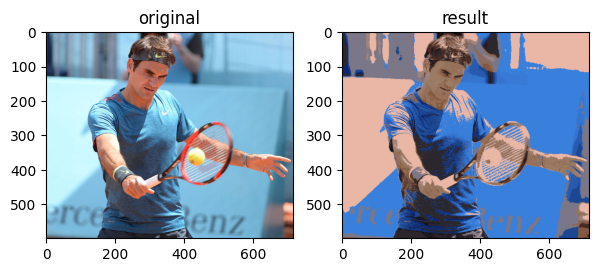

In [12]:
quant, model = SOM_function(img, pixels, 12, False, False, False)

img2 = plt.imread('federer2.jpg')
pixels2 = np.reshape(img2, (img2.shape[0]*img2.shape[1], 3)) / 255.

SOM_function_2(model, img2, pixels2)

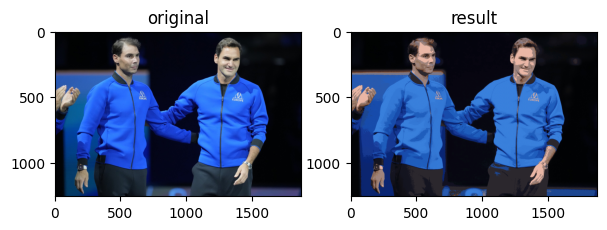

In [13]:
img3 = plt.imread('teamm.jpg')
pixels3 = np.reshape(img3, (img3.shape[0]*img3.shape[1], 3)) / 255.

SOM_function_2(model, img3, pixels3)

<font color='darkred'>